<a href="https://colab.research.google.com/github/afroozsheikh/IT_IUT/blob/main/recommendar_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightfm

     |████████████████████████████████| 317kB 6.3MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705348 sha256=1726868cac6316bc498654dda8314e11864c2e2ab94b7d8e14c3fb9ab0d9e1ab
  Stored in directory: /root/.cache/pip/wheels/c6/64/d4/673c7277f71ac4c5ad4835b94708c01b653ef2d3aa78ef20aa
Successfully built lightfm


## Importing Libraries

In [ ]:
from lightfm import LightFM
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score


# First part

## Model 1 and 2:
* learning_schedule='**adagrad**' and '**adadelta**'
* loss = '**warp**'

In [ ]:
# Load the MovieLens 100k dataset. Only five
# star ratings are treated as positive.
data = fetch_movielens(min_rating=5.0)
accuracy1 = []
accuracy2 = []


model1 = LightFM(learning_schedule='adagrad', loss='warp', no_components=30, user_alpha=0.001, item_alpha=0.001)
for i in range(40):
  model1.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy1.append(auc_score(model1, data['test']).mean())

## we could do : model1.fit(data['train'], epochs=40, verbose=0)


model2 = LightFM(learning_schedule='adadelta', loss='warp', no_components=30, user_alpha=0.001, item_alpha=0.001)
for i in range(40):
  model2.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy2.append(auc_score(model2, data['test']).mean())



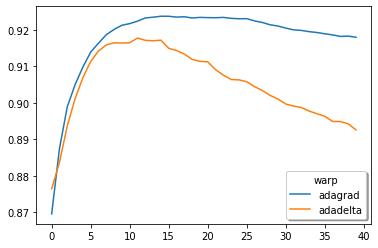

In [ ]:
x = np.arange(len(accuracy1))
plt.plot(x, np.array(accuracy1))
plt.plot(x, np.array(accuracy2))
plt.legend(['adagrad', 'adadelta'], loc='best', title='warp', shadow=True)
plt.show()

## Model 3 and 4:
* learning_schedule='**adagrad**' and '**adadelta**'
* loss = '**bpr**'

In [ ]:
accuracy3 = []
accuracy4 = []

model3 = LightFM(learning_schedule='adagrad', loss='bpr', no_components=30, user_alpha=0.01, item_alpha=0.01)
for i in range(40):
  model3.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy3.append(auc_score(model3, data['test']).mean())


model4 = LightFM(learning_schedule='adadelta', loss='bpr', no_components=30, user_alpha=0.01, item_alpha=0.01)
for i in range(40):
  model4.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy4.append(auc_score(model4, data['test']).mean())

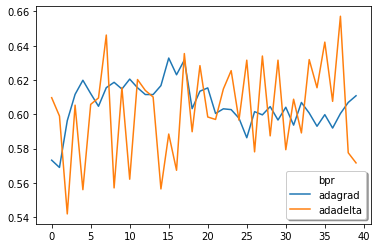

In [ ]:
x = np.arange(len(accuracy3))
plt.plot(x, np.array(accuracy3))
plt.plot(x, np.array(accuracy4))
plt.legend(['adagrad', 'adadelta'], loc='best', title='bpr', shadow=True)
plt.show()

## Model 5 and 6:
* learning_schedule='**adagrad**' and '**adadelta**'
* loss = '**logistic**'

In [ ]:
accuracy5 = []
accuracy6 = []

model5 = LightFM(learning_schedule='adagrad', loss='logistic', no_components=30, user_alpha=0.001, item_alpha=0.001)
for i in range(40):
  model5.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy5.append(auc_score(model5, data['test']).mean())


model6 = LightFM(learning_schedule='adadelta', loss='logistic', no_components=30, user_alpha=0.001, item_alpha=0.001)
for i in range(40):
  model6.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy6.append(auc_score(model6, data['test']).mean())

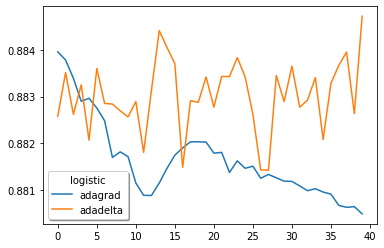

In [ ]:
x = np.arange(len(accuracy5))
plt.plot(x, np.array(accuracy5))
plt.plot(x, np.array(accuracy6))
plt.legend(['adagrad', 'adadelta'], loc='best', title='logistic', shadow=True)
plt.show()

## Model 7 and 8:
* learning_schedule='**adagrad**' and '**adadelta**'
* loss = '**warp-kos**'

In [ ]:
accuracy7 = []
accuracy8 = []

model7 = LightFM(learning_schedule='adagrad', loss='warp-kos', no_components=30, user_alpha=0.001, item_alpha=0.001)
for i in range(40):
  model7.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy7.append(auc_score(model7, data['test']).mean())


model8 = LightFM(learning_schedule='adadelta', loss='warp-kos', no_components=30, user_alpha=0.001, item_alpha=0.001)
for i in range(40):
  model8.fit_partial(data['train'], epochs=1, verbose=0)
  accuracy8.append(auc_score(model8, data['test']).mean())

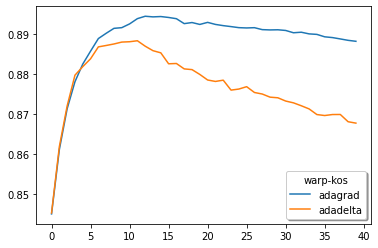

In [ ]:
x = np.arange(len(accuracy7))
plt.plot(x, np.array(accuracy7))
plt.plot(x, np.array(accuracy8))
plt.legend(['adagrad', 'adadelta'], loc='best', title='warp-kos', shadow=True)
plt.show()

# Srcond part

In [ ]:
def sample_recommendation(model, data, user_ids):
    n_users, n_items = data['train'].shape

    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]

        scores = model.predict(user_id, np.arange(n_items))
        print(scores)
        top_items = data['item_labels'][np.argsort(-scores)]

        print("User %s" % user_id)
        print("     Known positives:")

        for x in known_positives[:3]:
            print("        %s" % x)

        print("     Recommended:")

        for x in top_items[:3]:
            print("        %s" % x)


In [ ]:
data = fetch_movielens(min_rating=5.0)
final_model = LightFM(learning_schedule='adagrad', loss='warp', no_components=30, user_alpha=0.001, item_alpha=0.001)
final_model.fit(data['train'], epochs=40, verbose=1)
sample_recommendation(final_model, data, [3, 25, 450, 4])


Epoch: 100%|██████████| 40/40 [00:01<00:00, 36.08it/s]

[-0.4362502  -0.7363333  -0.6045304  ... -0.7589089  -0.61235875
 -0.7887036 ]
User 3
     Known positives:
        Contact (1997)
        Air Force One (1997)
        In & Out (1997)
     Recommended:
        Air Force One (1997)
        L.A. Confidential (1997)
        Lost Highway (1997)
[ 0.6056391  -0.46613488 -0.59616977 ... -1.008689   -0.9325987
 -0.95344484]
User 25
     Known positives:
        Fargo (1996)
        Godfather, The (1972)
        L.A. Confidential (1997)
     Recommended:
        L.A. Confidential (1997)
        Godfather, The (1972)
        Titanic (1997)
[-0.39622363 -0.8606302   0.08429445 ... -0.8799987  -0.91009223
 -1.0511413 ]
User 450
     Known positives:
        Event Horizon (1997)
        Scream (1996)
        Conspiracy Theory (1997)
     Recommended:
        Titanic (1997)
        Air Force One (1997)
        Scream (1996)
[-0.75873965 -1.961391   -1.144635   ... -1.8849478  -1.9573401
 -1.9643933 ]
User 4
     Known positives:
        Clerks (199